In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Define flight phase times (seconds)
launch_pad_time = 3600
flight_time = 300
recovery_time = 1800
total_time = launch_pad_time + flight_time + recovery_time

#Check time in seconds
launch_ready_check_time = 60
#Check every (x) seconds
launch_ready_check_rate = 540

In [3]:
#Define Variables

#Bitpackage sizes (bits)
power_on_bitpackage = 32
launch_ready_bitpackage = 352
launch_mode_bitpackage = 416
recovery_bitpackage = 64
bitrate = 19200

#Transmission frequency (time between transmissions (milliseconds))
transmission_frequency = 32

#Transmission Voltage (Volts) and Current (Amps)
transmission_voltage = 3.3
transmission_current = 0.095
#Rest Current of Feather (amps)
floor_amperage = 0.013

total_transmission_current = transmission_current + floor_amperage

In [4]:
def power_draw(bits, bitrate, volts, amps):
    energy = volts * amps * (bits / bitrate)
    return energy

In [5]:
def transmit_time(bits, bitrate):
    return bits / bitrate

In [6]:
def transmit(time_millisecond, transmission_time):
    if time_millisecond % transmission_frequency <= transmission_time:
        return True
    else:
        return False

In [7]:
def ms(time):
    return time * 1000

In [8]:
x = np.linspace(0, total_time, ms(total_time))
y = np.zeros(ms(total_time))
for i in range(ms(total_time)):
    if (i<=ms(launch_pad_time)):
        if (i % ms(launch_ready_check_rate) <= ms(launch_ready_check_time) and transmit(i, transmit_time(launch_ready_bitpackage, bitrate))):
             y[i] = power_draw(launch_ready_bitpackage, bitrate, transmission_voltage, total_transmission_current)

        elif (transmit(i, transmit_time(power_on_bitpackage, bitrate))):
            y[i] = power_draw(power_on_bitpackage, bitrate, transmission_voltage, total_transmission_current)

    elif(i<ms(launch_pad_time+flight_time) and transmit(i, transmit_time(launch_mode_bitpackage, bitrate))):
         y[i] = power_draw(launch_mode_bitpackage, bitrate, transmission_voltage, total_transmission_current)

    elif(i<ms(total_time) and transmit(i, transmit_time(recovery_bitpackage, bitrate))):
        y[i] = power_draw(recovery_bitpackage, bitrate, transmission_voltage, total_transmission_current)

    else:
        y[i] = power_draw(floor_amperage, bitrate, transmission_voltage, total_transmission_current)
    
        

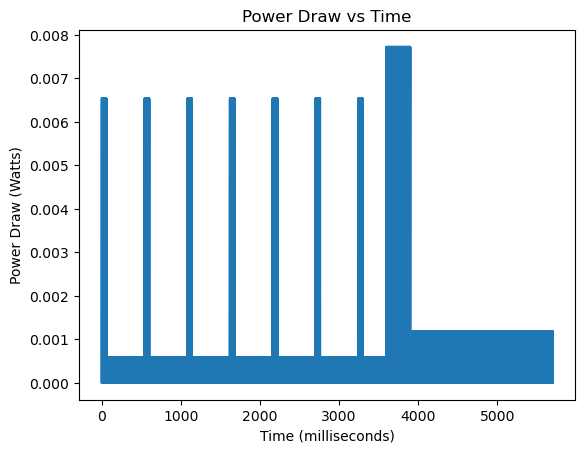

In [9]:
plt.plot(x, y)
plt.xlabel('Time (milliseconds)')
plt.ylabel('Power Draw (Watts)')
plt.title('Power Draw vs Time')
plt.show()


In [11]:
total_watt = 0
for i in range(y.size):
    total_watt += y[i]

print("Total Energy Consumed: ", total_watt, "Watt Seconds")

Total Energy Consumed:  284.53162210941076 Watt Seconds
